# Random Forest - Caso Kyphosis

La Kyphosis es una curvatura convexa excesivamente anormal de la espira vertebral. El dataset kyphosis contiene 81 filas y 4 columnas. Representa datos de niños que han tenido intervenciones quirúrgicas a la columna. El dataset contiene las siguientes columnas:

*Entradas*

- Age: edad en meses
- Number: el número de vértebras involucradas
- Start: el número de la primera vértebra operada

*Salida*
- Kyphosis: vatiable categórica con valores present o absent que indica si se desarrolló kyphosis después de la operación


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('kyphosis.csv')

### Análisis Exploratorio

In [10]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [11]:
df.isna().sum()

,0
Kyphosis,0
Age,0
Number,0
Start,0


In [12]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


<Axes: >

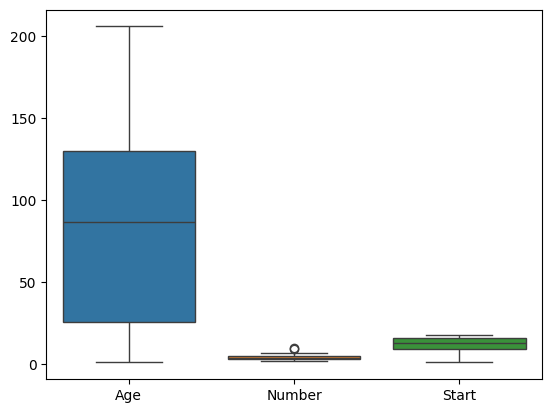

In [13]:
sns.boxplot(df)

In [14]:
df['Number'].value_counts()

,count
Number,
3,23
4,18
5,17
2,12
7,5
6,4
9,1
10,1


In [15]:
# Preguntas exploratorias del enunciado
total_pacientes = len(df)
kyphosis_counts = df['Kyphosis'].value_counts()
porc_kyphosis = (kyphosis_counts / total_pacientes) * 100

print("Total de pacientes:", total_pacientes)
print("\nDistribución de Kyphosis:")
print(kyphosis_counts)
print('\nPorcentaje de la muestra que presenta Kyphosis ("present"):',
      round(porc_kyphosis.get('present', 0), 2), "%")

edad_promedio_kyphosis = df.loc[df['Kyphosis'] == 'present', 'Age'].mean()
print("\nEdad promedio de niños con Kyphosis (present):", round(edad_promedio_kyphosis, 2), "meses")

Total de pacientes: 81

Distribución de Kyphosis:
Kyphosis
absent     64
present    17
Name: count, dtype: int64

Porcentaje de la muestra que presenta Kyphosis ("present"): 20.99 %

Edad promedio de niños con Kyphosis (present): 97.82 meses


### Formulación del modelo

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

Conteo de clases en Kyphosis:
Kyphosis
absent     64
present    17
Name: count, dtype: int64


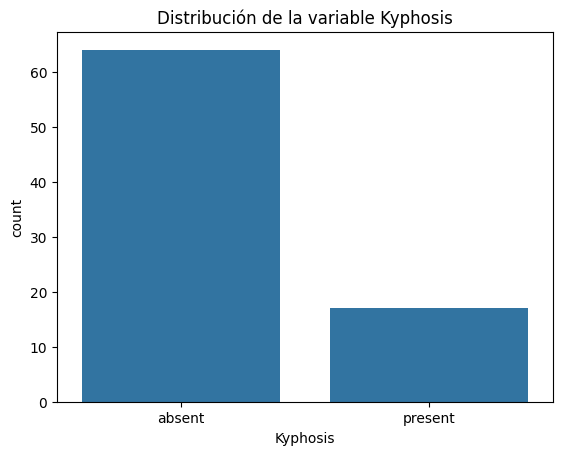

In [17]:
# Revisión del desbalance de clases
class_counts = df['Kyphosis'].value_counts()
print("Conteo de clases en Kyphosis:")
print(class_counts)

sns.countplot(x=df['Kyphosis'])
plt.title('Distribución de la variable Kyphosis')
plt.show()

### Cross Validation

In [18]:
X = df[['Age', 'Number', 'Start']]
y = df['Kyphosis']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=0)

### Modelo Decision Tree

In [20]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluación Modelo Decision Tree

In [21]:
# Predicciones y  Evaluación para Decision Tree
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Model")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

Decision Tree Model
Accuracy: 0.7647058823529411
              precision    recall  f1-score   support

      absent       0.83      0.83      0.83        12
     present       0.60      0.60      0.60         5

    accuracy                           0.76        17
   macro avg       0.72      0.72      0.72        17
weighted avg       0.76      0.76      0.76        17

Confusion Matrix:
 [[10  2]
 [ 2  3]]


### Modelo Random Forest

In [22]:
forest_model = RandomForestClassifier(n_estimators=200, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

### Evaluación del Modelo RF

In [23]:
# Predicciones y  Evaluación para Random Forest
y_pred_forest = forest_model.predict(X_test)
print("\nModelo Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_forest))


Modelo Random Forest
Accuracy: 0.7058823529411765
              precision    recall  f1-score   support

      absent       0.77      0.83      0.80        12
     present       0.50      0.40      0.44         5

    accuracy                           0.71        17
   macro avg       0.63      0.62      0.62        17
weighted avg       0.69      0.71      0.70        17

Matriz de Confusión:
 [[10  2]
 [ 3  2]]


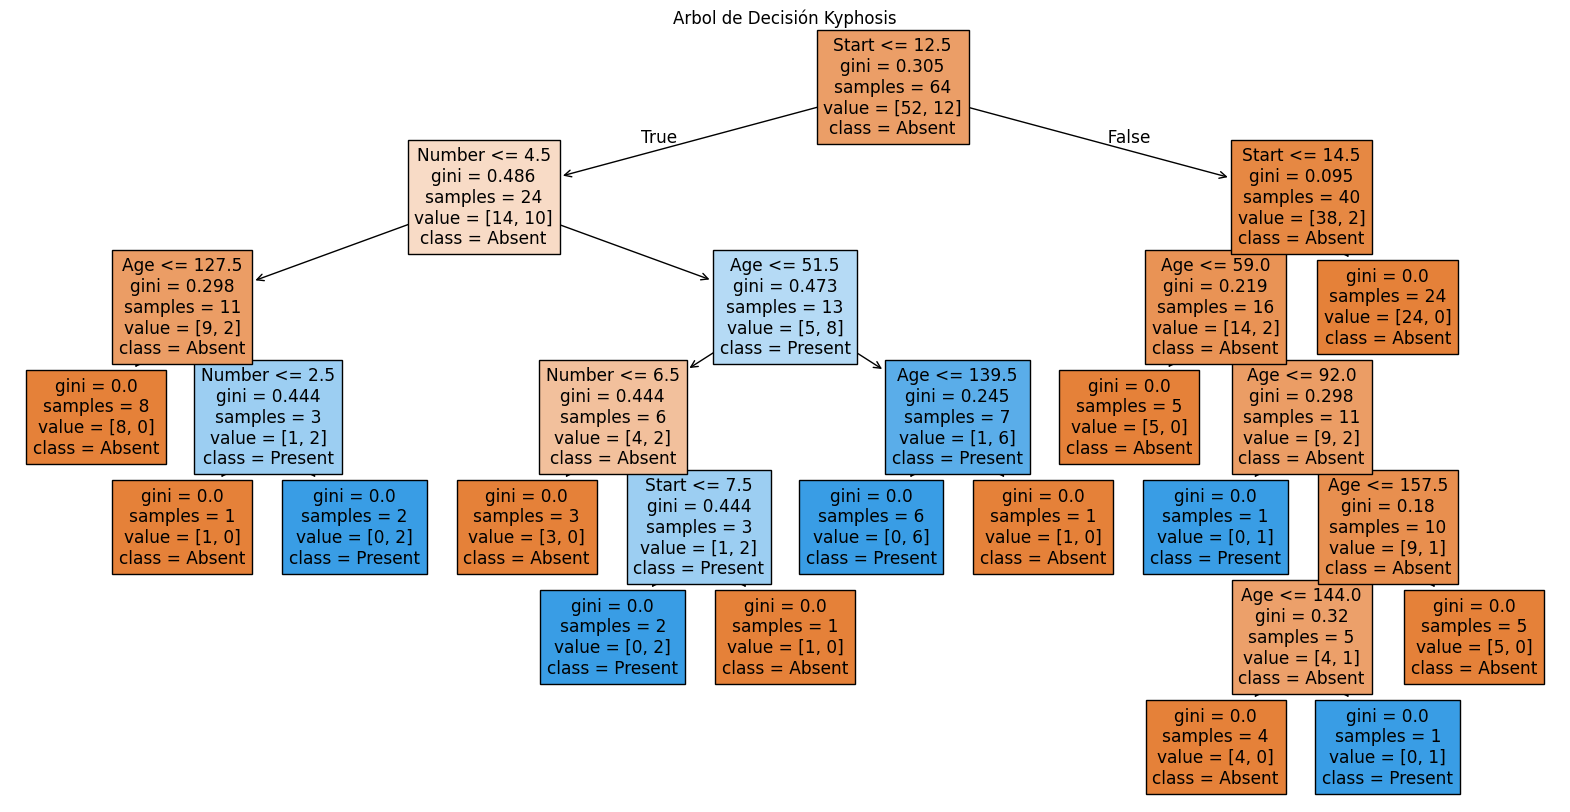

In [24]:
# Graficar Arbol de Decisión

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Absent', 'Present'], max_depth = None)
plt.title("Arbol de Decisión Kyphosis")
plt.show()

In [25]:
from sklearn.tree import export_graphviz
import graphviz

# Exportar Arbol a dot file string
dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Vive', 'Vive'],
                           filled=True, rounded=True,
                           special_characters=True)

# Usar graphviz para crear gráfico
graph = graphviz.Source(dot_data)
graph.render("titanic_decision_tree")  # Guarda archivo, ej., a PDF o PNG

# Desplegar
graph.view()

'titanic_decision_tree.pdf'

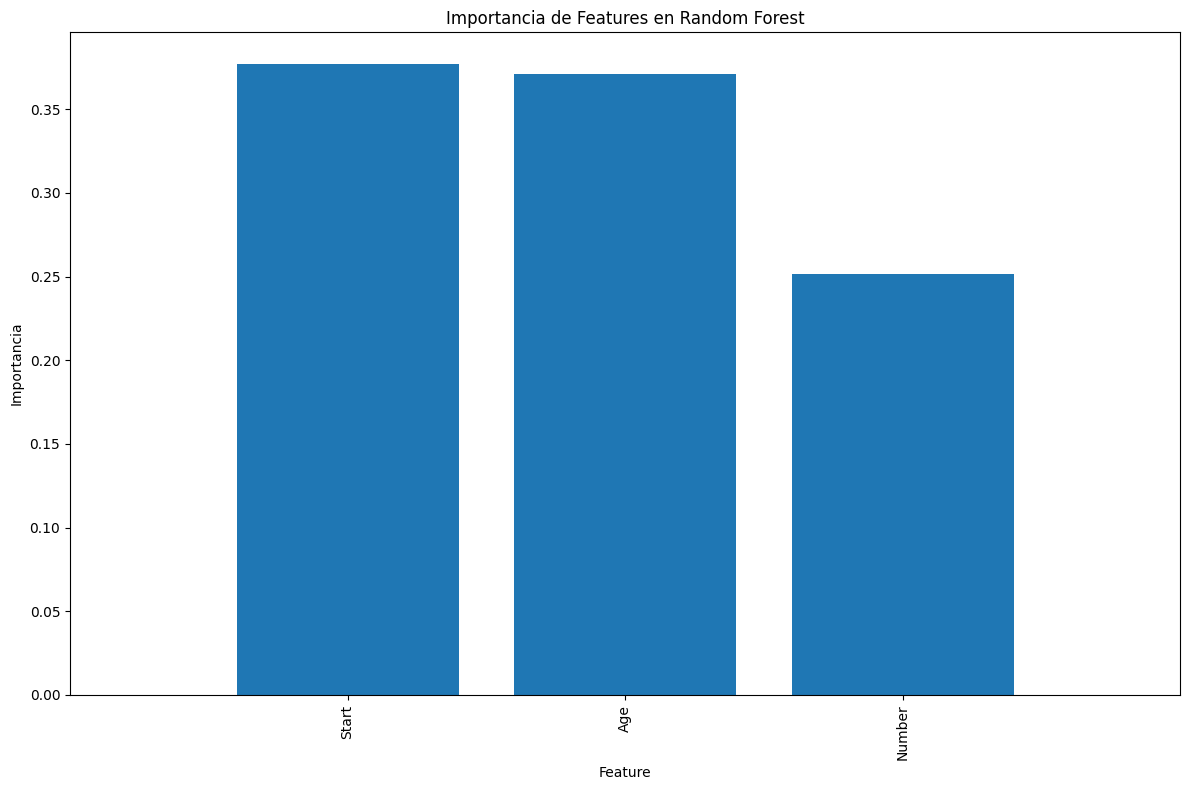

In [26]:
# Para revisar importancias de los Features
importances = forest_model.feature_importances_

# Obtener indices de feature importances
indices = np.argsort(importances)[::-1]

# Nombres de los Features
feature_names = X.columns

# Plot
plt.figure(figsize=(12, 8))
plt.title("Importancia de Features en Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

In [27]:
# Generar informes de classificación
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_forest = classification_report(y_test, y_pred_forest, output_dict=True)

# Convertir a df
tree_df = pd.DataFrame(report_tree).transpose()
forest_df = pd.DataFrame(report_forest).transpose()

# Combinar reportes
comparison_df = pd.concat([tree_df, forest_df], axis=1, keys=['Decision Tree', 'Random Forest'])

# Desplegar
comparison_df

Decision Tree                                Random Forest  \
                 precision    recall  f1-score    support     precision   
absent            0.833333  0.833333  0.833333  12.000000      0.769231   
present           0.600000  0.600000  0.600000   5.000000      0.500000   
accuracy          0.764706  0.764706  0.764706   0.764706      0.705882   
macro avg         0.716667  0.716667  0.716667  17.000000      0.634615   
weighted avg      0.764706  0.764706  0.764706  17.000000      0.690045   

                                             
                recall  f1-score    support  
absent        0.833333  0.800000  12.000000  
present       0.400000  0.444444   5.000000  
accuracy      0.705882  0.705882   0.705882  
macro avg     0.616667  0.622222  17.000000  
weighted avg  0.705882  0.695425  17.000000

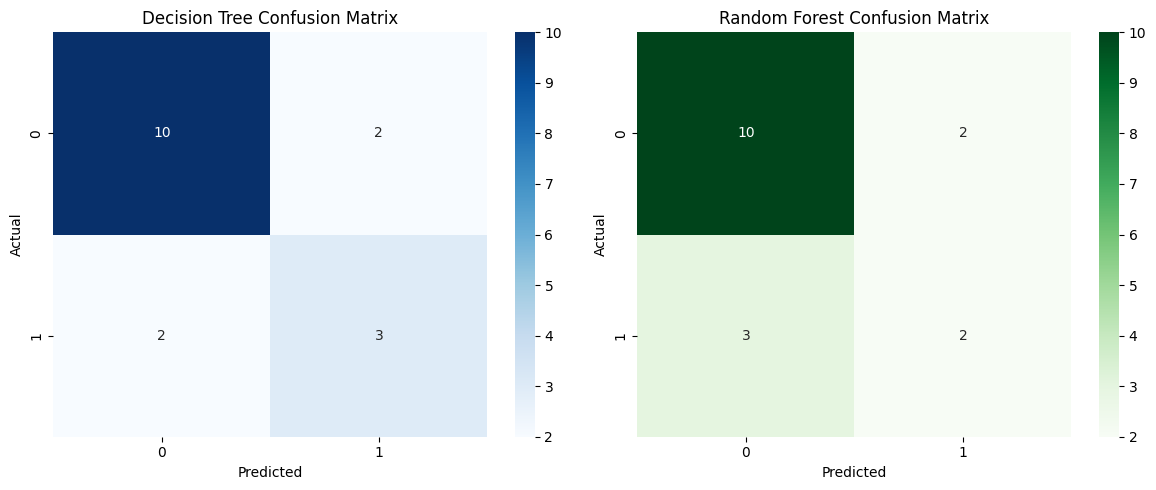

In [28]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_forest = confusion_matrix(y_test, y_pred_forest)

# Set up two subplots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for Decision Tree
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Decision Tree Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Plot confusion matrix for Random Forest
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

### Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los parametos para el grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]  # Method for sampling data
}


In [30]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Extract best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-validation Accuracy: {:.2f}".format(best_score))

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print a classification report
print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/u

Best Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.86

Classification Report for Best Model:
               precision    recall  f1-score   support

      absent       0.73      0.92      0.81        12
     present       0.50      0.20      0.29         5

    accuracy                           0.71        17
   macro avg       0.62      0.56      0.55        17
weighted avg       0.66      0.71      0.66        17



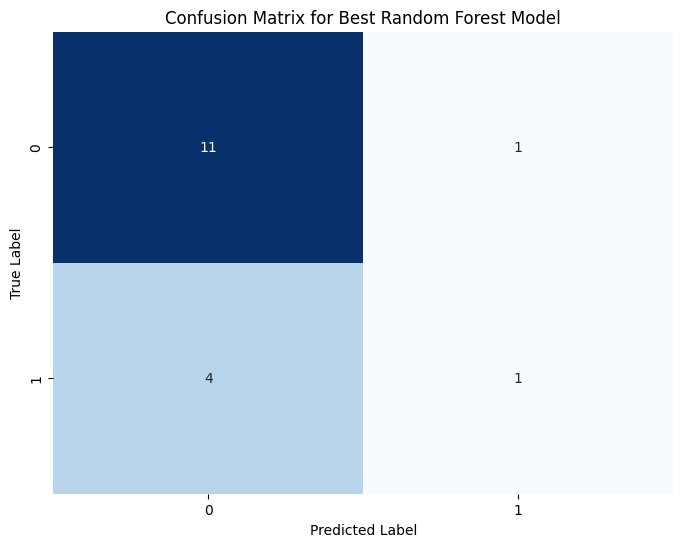


Classification Report for Best Model:
               precision    recall  f1-score   support

      absent       0.73      0.92      0.81        12
     present       0.50      0.20      0.29         5

    accuracy                           0.71        17
   macro avg       0.62      0.56      0.55        17
weighted avg       0.66      0.71      0.66        17



In [31]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Best Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report for additional insights
print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred))

In [32]:
# Cálculo explícito de Sensibilidad y Especificidad
from sklearn.metrics import confusion_matrix

def sens_esp(y_true, y_pred, positive_label='present'):
    # Ordenamos etiquetas para tener matriz en forma [[TN, FP],[FN, TP]]
    labels = ['absent', 'present']
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    tn, fp, fn, tp = cm.ravel()
    sensibilidad = tp / (tp + fn) if (tp + fn) > 0 else 0
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0
    return sensibilidad, especificidad, cm

print('--- Árbol de Decisión ---')
sens_tree, esp_tree, cm_tree_calc = sens_esp(y_test, y_pred_tree)
print('Matriz de confusión:\n', cm_tree_calc)
print('Sensibilidad (TPR):', round(sens_tree, 3))
print('Especificidad (TNR):', round(esp_tree, 3))

print('\n--- Random Forest ---')
sens_forest, esp_forest, cm_forest_calc = sens_esp(y_test, y_pred_forest)
print('Matriz de confusión:\n', cm_forest_calc)
print('Sensibilidad (TPR):', round(sens_forest, 3))
print('Especificidad (TNR):', round(esp_forest, 3))

--- Árbol de Decisión ---
Matriz de confusión:
 [[10  2]
 [ 2  3]]
Sensibilidad (TPR): 0.6
Especificidad (TNR): 0.833

--- Random Forest ---
Matriz de confusión:
 [[10  2]
 [ 3  2]]
Sensibilidad (TPR): 0.4
Especificidad (TNR): 0.833


# Análisis comparativo

**Caída del rendimiento**

El modelo complejo (Random Forest) tuvo un desempeño inferior al modelo simple (Árbol de Decisión). La exactitud bajó del 76% al 70%.

**Sensibilidad Médica**

En un contexto médico, identificar correctamente a los pacientes enfermos (Sensibilidad) es crucial. El Árbol de Decisión logró un 60% (detectó 3 de 5 casos reales en prueba), mientras que el Random Forest base cayó al 40% (detectó 2 de 5) y el optimizado cayó al 20% (detectó solo 1 de 5).

**Efecto del Desbalance**

 Al pasar por la optimización (GridSearch), el Random Forest se volvió más conservador. Como la clase mayoritaria es "absent" (pacientes sanos), el modelo aprendió que predecir "absent" casi siempre es una forma segura de aumentar la exactitud global, sacrificando totalmente la detección de los casos positivos.



---



# Conclusión

El desarrollo de este análisis comparativo demuestra que, en la modelación predictiva de diagnósticos médicos como la Kyphosis, la implementación de algoritmos de mayor complejidad no garantiza necesariamente un mejor desempeño. Aunque teóricamente el modelo de Random Forest es superior para mitigar el sobreajuste (overfitting), en este caso de estudio el Árbol de Decisión base presentó resultados más favorables y aplicables.

El modelo de Árbol de Decisión logró una Exactitud (Accuracy) del 76.47% y una Sensibilidad (Recall) del 60%, superando al Random Forest, que obtuvo un 70.58% de exactitud y apenas un 40% de sensibilidad (cayendo al 20% tras la optimización de hiperparámetros).